In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture

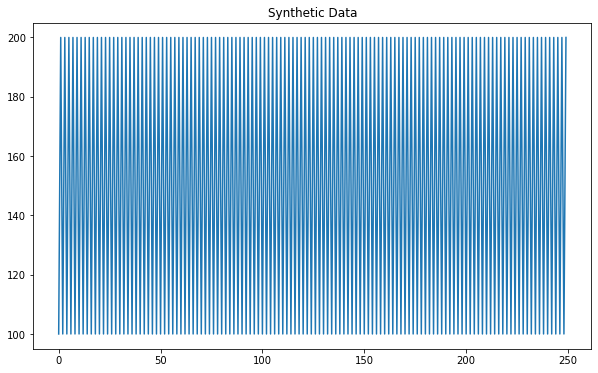

In [154]:
x = np.arange(0, 250)
y = np.empty([250], dtype = int)
for i in range (0, 250):
    if(i%2 == 0):
        y[i] = 100
    else:
        y[i] = 200
sd = y
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.title("Synthetic Data")
plt.show()

In [155]:
seasonal_data = pd.DataFrame(zip(x,y),columns=['Time','Value'])
seasonal_data

,Time,Value
0,0,100
1,1,200
2,2,100
3,3,200
4,4,100
...,...,...
245,245,200
246,246,100
247,247,200
248,248,100


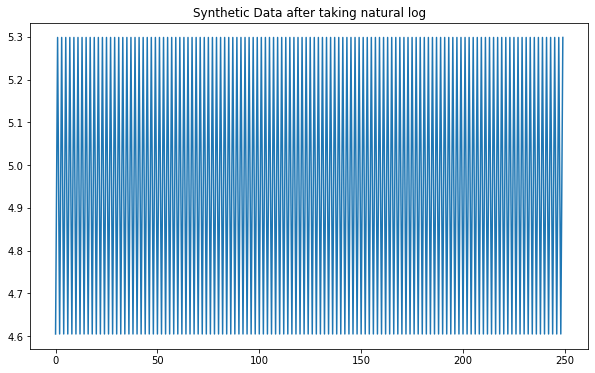

In [156]:
log_data = np.log(seasonal_data['Value'])
plt.figure(figsize=(10,6))
plt.plot(seasonal_data['Time'], log_data)
plt.title("Synthetic Data after taking natural log")
plt.show()

In [157]:
nlog_data = pd.DataFrame(zip(seasonal_data['Time'], log_data),columns=['Time','Log Value'])
nlog_data

,Time,Log Value
0,0,4.605170
1,1,5.298317
2,2,4.605170
3,3,5.298317
4,4,4.605170
...,...,...
245,245,5.298317
246,246,4.605170
247,247,5.298317
248,248,4.605170


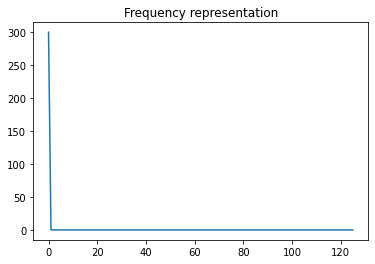

In [158]:
N = 250
sr = 1
y = np.array(seasonal_data['Value'])
f = fftpack.fftfreq(len(y))
yf = fftpack.fft(y)

T = 1.0 / N
x = np.linspace(0.0, N*T, N)
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.title("Frequency representation")
plt.show()

In [159]:
freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2]),2.0/N * np.abs(yf[:N//2])),columns=['Freq','Ampli'])
freq_ampli

,Freq,Ampli
0,0.000,3.000000e+02
1,0.004,0.000000e+00
2,0.008,3.226999e-15
3,0.012,2.151711e-15
4,0.016,0.000000e+00
...,...,...
120,0.480,0.000000e+00
121,0.484,0.000000e+00
122,0.488,7.217567e-16
123,0.492,1.078683e-15


In [160]:
freq_ampli = freq_ampli.iloc[1:,:]

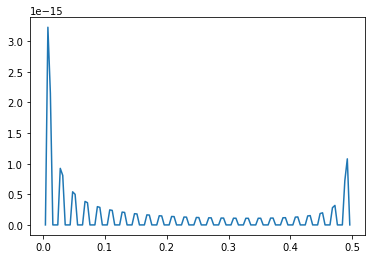

In [161]:
plt.plot(freq_ampli.Freq,freq_ampli.Ampli)

In [162]:
freq_ampli

,Freq,Ampli
1,0.004,0.000000e+00
2,0.008,3.226999e-15
3,0.012,2.151711e-15
4,0.016,0.000000e+00
5,0.020,0.000000e+00
...,...,...
120,0.480,0.000000e+00
121,0.484,0.000000e+00
122,0.488,7.217567e-16
123,0.492,1.078683e-15


In [163]:
freq_ampli.Ampli.value_counts()

0.000000e+00    74
1.286000e-16     1
7.217567e-16     1
1.111361e-16     1
1.790536e-16     1
1.081264e-16     1
1.160400e-16     1
1.089261e-16     1
3.834952e-16     1
1.182847e-16     1
1.215004e-16     1
3.626429e-16     1
1.270355e-16     1
1.202851e-16     1
1.854123e-16     1
1.120281e-16     1
1.151257e-16     1
1.119619e-16     1
2.453318e-16     1
3.182738e-16     1
1.090318e-16     1
2.813942e-16     1
2.984181e-16     1
8.084535e-16     1
2.151711e-15     1
5.404932e-16     1
3.226999e-15     1
2.370481e-16     1
1.356742e-16     1
1.078683e-15     1
1.607525e-16     1
1.300476e-16     1
1.492117e-16     1
4.993586e-16     1
1.640289e-16     1
1.166776e-16     1
1.833650e-16     1
9.234591e-16     1
1.464613e-16     1
1.113911e-16     1
1.977470e-16     1
2.034228e-16     1
1.466713e-16     1
1.093920e-16     1
1.086097e-16     1
1.081822e-16     1
2.859081e-16     1
2.092700e-16     1
1.521227e-16     1
1.376661e-16     1
1.270889e-16     1
Name: Ampli, dtype: int64

In [164]:
frame_size = 50
Fs = 1
dt = 1/Fs
freq_vector = np.fft.rfftfreq(frame_size, d=dt)

In [165]:
yf1 = yf[yf != 0]
yf1

array([ 3.75000000e+04-0.00000000e+00j,  1.31059133e-13-3.81490279e-13j,
       -7.66612349e-14-2.57807277e-13j,  4.20363122e-14-1.07506209e-13j,
       -2.47314171e-14-9.79837321e-14j,  2.71999195e-14-6.18444875e-14j,
       -1.27484961e-14-6.11040933e-14j,  2.10923069e-14-4.30471890e-14j,
       -7.42440633e-15-4.47182299e-14j,  1.77632247e-14-3.28013274e-14j,
       -4.41766360e-15-3.54644273e-14j,  1.56704366e-14-2.63603878e-14j,
       -2.48826434e-15-2.95263470e-14j,  1.42360329e-14-2.19457474e-14j,
       -1.14815597e-15-2.54019175e-14j,  1.31949504e-14-1.87416247e-14j,
       -1.66628074e-16-2.23810853e-14j,  1.24088683e-14-1.63223130e-14j,
        5.79185018e-16-2.00857086e-14j,  1.17989386e-14-1.44451424e-14j,
        1.16031991e-15-1.82971593e-14j,  1.13173824e-14-1.29630647e-14j,
        1.62023167e-15-1.68816965e-14j,  1.09341152e-14-1.17834897e-14j,
        1.98641461e-15-1.57547013e-14j,  1.06299575e-14-1.08473884e-14j,
        2.27636711e-15-1.48623192e-14j,  1.03930528

In [166]:
quefrency = np.fft.rfftfreq(np.log(yf1).size,freq_vector[1] - freq_vector[0])
cepstrum = np.fft.rfft(np.log(np.abs(yf1)))

In [167]:
quefrency

array([ 0.        ,  0.49019608,  0.98039216,  1.47058824,  1.96078431,
        2.45098039,  2.94117647,  3.43137255,  3.92156863,  4.41176471,
        4.90196078,  5.39215686,  5.88235294,  6.37254902,  6.8627451 ,
        7.35294118,  7.84313725,  8.33333333,  8.82352941,  9.31372549,
        9.80392157, 10.29411765, 10.78431373, 11.2745098 , 11.76470588,
       12.25490196, 12.74509804, 13.23529412, 13.7254902 , 14.21568627,
       14.70588235, 15.19607843, 15.68627451, 16.17647059, 16.66666667,
       17.15686275, 17.64705882, 18.1372549 , 18.62745098, 19.11764706,
       19.60784314, 20.09803922, 20.58823529, 21.07843137, 21.56862745,
       22.05882353, 22.54901961, 23.03921569, 23.52941176, 24.01960784,
       24.50980392, 25.        ])

In [168]:
cepstrum

array([-3.10678677e+03+0.00000000e+00j,  2.58530967e+01-1.14908083e-14j,
        1.23600818e+02-2.57571742e-14j,  2.03172413e+00-2.39253062e-14j,
        1.02226884e+02-3.17523785e-14j,  2.31766775e-01-4.06341627e-14j,
        9.34290055e+01+1.22124533e-15j,  3.05934071e-03-6.43929354e-15j,
        8.85855095e+01-4.01900735e-14j, -2.16658284e-02-2.81619454e-14j,
        8.55139561e+01+2.32933252e-15j, -1.87619826e-02-8.72522482e-16j,
        8.33852510e+01-2.89837241e-14j, -1.39673979e-02-2.83659121e-14j,
        8.18206298e+01+2.59783015e-15j, -1.04412360e-02+1.83158184e-15j,
        8.06249307e+01+2.09312603e-14j, -8.07783560e-03-9.94759830e-14j,
        7.96881525e+01+1.57687232e-14j, -6.50191576e-03+8.93700920e-15j,
        7.89438293e+01+3.18522068e-14j, -5.45025417e-03+1.40446074e-14j,
        7.83495627e+01+1.16504386e-14j, -4.76603279e-03-1.20558939e-15j,
        7.78771516e+01-8.99494233e-15j, -4.36110478e-03-3.08264807e-14j,
        7.75072490e+01-3.35664547e-14j, -4.19160771

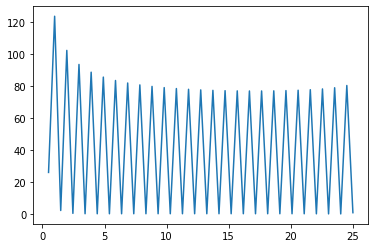

In [169]:
cep = pd.DataFrame(zip(quefrency,cepstrum.real),columns=['Quefrency','Cepstrum'])
cep = cep.iloc[1:,:]
plt.plot(cep.Quefrency,cep.Cepstrum)

In [170]:
dfx = np.array(seasonal_data['Value']).reshape(-1,1)
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm0 = gmm

C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site

In [171]:
dfx = np.array(nlog_data['Log Value']).reshape(-1,1)
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm1 = gmm

C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site

In [172]:
dfx = freq_ampli
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm2 = gmm

In [173]:
dfx = cep
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm3 = gmm

In [174]:
best_gmm0

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

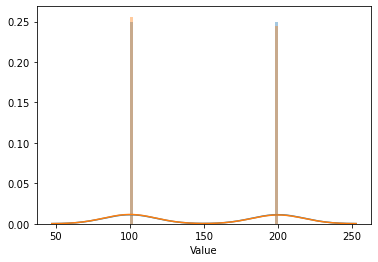

In [175]:
sns.distplot(seasonal_data['Value'],bins=50)
z,_ = best_gmm0.sample(250)
sns.distplot(z,bins=50)

In [176]:
print(best_gmm0.score(np.array(seasonal_data['Value']).reshape(-1,1)))
print(best_gmm0.score(z))

5.29566956521752
4.7726149561540545


In [177]:
best_gmm2

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [178]:
best_gmm2.weights_

array([1.])

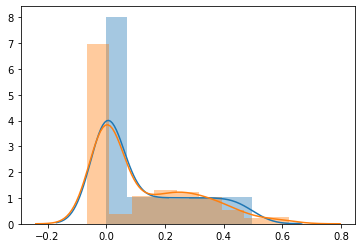

In [179]:
freq1 = freq_ampli
y,_ = best_gmm2.sample(120)
sns.distplot(freq1)
sns.distplot(y)

In [180]:
print(best_gmm2.score(freq1))
print(best_gmm2.score(y))

6.513543408396835
5.9195307829451265


In [181]:
freq1.describe()

,Freq,Ampli
count,124.000000,1.240000e+02
mean,0.250000,1.373690e-16
std,0.143759,3.810013e-16
min,0.004000,0.000000e+00
25%,0.127000,0.000000e+00
50%,0.250000,0.000000e+00
75%,0.373000,1.289619e-16
max,0.496000,3.226999e-15


In [182]:
best_gmm2.means_

array([[2.50000000e-01, 1.37369004e-16]])

In [183]:
best_gmm3

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

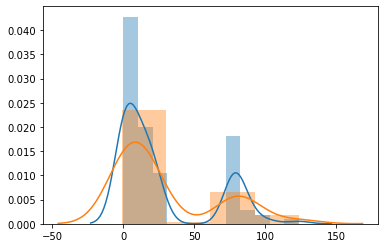

In [184]:
cep1 = cep
a,_ = best_gmm3.sample(52)
sns.distplot(cep1)
sns.distplot(a)

In [185]:
print(best_gmm3.score(cep1))
print(best_gmm3.score(a))

-4.067587146784582
-4.233102024097522


In [186]:
best_gmm1

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

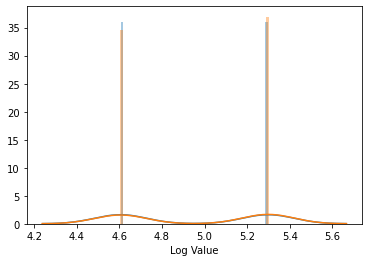

In [187]:
sns.distplot(nlog_data['Log Value'],bins=50)
z2,_ = best_gmm1.sample(250)
sns.distplot(z2,bins=50)

In [188]:
print(best_gmm1.score(np.array(nlog_data['Log Value']).reshape(-1,1)))
print(best_gmm1.score(z2))

5.295669561579541
4.78674982282404
